# Testing the PyFreatboard API

**PyFreatboard** was intended to have a simple way to draw freatboard diagrams (aka shapes) using Python. Most of the available solutions use SVG as the graphics engine while I wanted something based on Matplotlib.

## Defining a shape

Shapes (or diagrams) are composed of Fingers. Therefore, there is a 
* `Finger` class to define a finger position, harmonic function, fingering, ... and 
* a `Shape` class that contains a set of fingers.

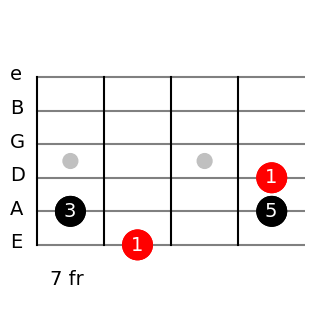

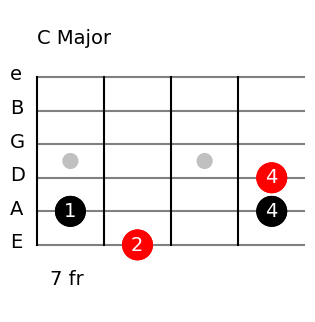

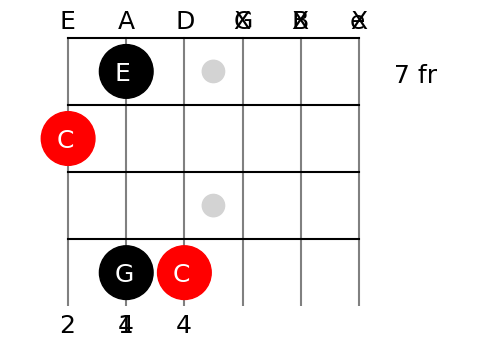

In [1]:
from PyFreatboard.finger import Finger
from PyFreatboard.shape import Shape
from PyFreatboard.draw_shape import DrawShape
from PyFreatboard.definitions import PyFreatboard as PF

f1 = Finger(pitch='C', function='1', string='E', freat=8, finger='2')
f2 = Finger(pitch='E', function='3', string='A', freat=7, finger='1')
f3 = Finger(pitch='G', function='5', string='A', freat=10, finger='4')
f4 = Finger(pitch='C', function='1', string='D', freat=10, finger='4')
c_shape = Shape([f1, f2, f3, f4])

# Draw diagram showing harmonic function
draw = DrawShape()
f = draw.draw(c_shape, text=PF.TEXT_FUNCTION, return_fig=True)
f.savefig('shape.png', bbox_inches='tight')

# Draw diagram showing fingering and shape name
draw.draw(c_shape, text=PF.TEXT_FINGER, shape_name="C Major")

# Draw diagram showing Note name in vertical--> WARNING! Notes are show using enharmony! 
draw_v = DrawShape(freat_size=15) # For vertical diagrams it is better reduce freat_size from 20 to 15
draw_v.draw_vertical(c_shape, text=PF.TEXT_PITCH, show_string_names=True) # In vertical mode string names are by default disables


## Automatic shape generation

Since defining the *fingers* one by one is tedious, there is a `BuildShape` class that can generate them automatically.

The class follows the following steps:

* Given a root and a shape type (defined in the `shapes.csv` file), it generates all shape notes.
* Finds at which position on the freatboard these notes can be played.
* Recursively, all sets of shapes are generated in which the lower freat and the upper freat are within six or less of each other.
* An automatic fingering algorithm is used to assign with which finger to play each note.
* The resulting shapes are filtered using various heuristics to keep only the most playable shapes.

With the current fingering and filtering rules, the algorithm can generate the standard *Berklee* shapes plus some additional shapes that are variants of them. By modifying these rules, other shapes/fingerings could be created.

0


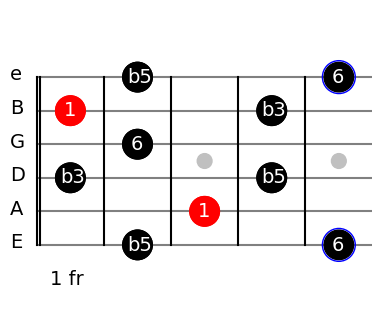

1


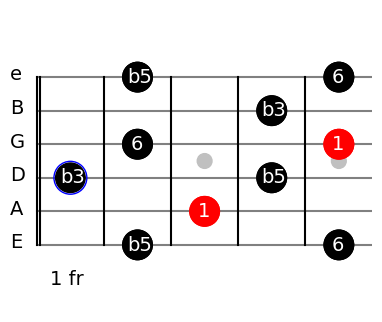

4


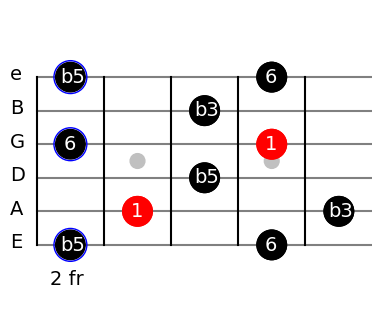

6


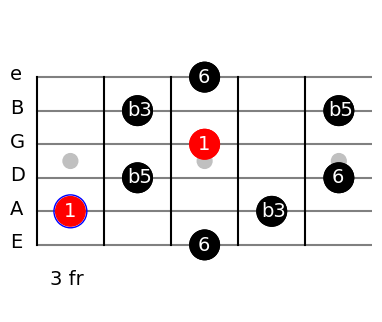

7


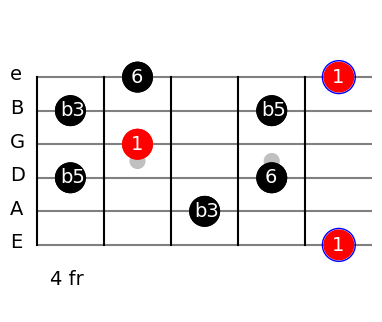

10


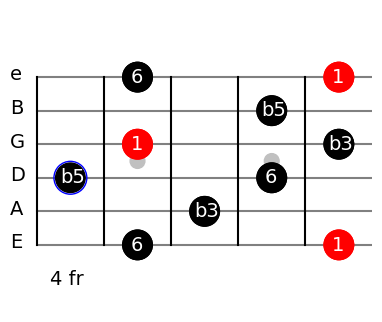

12


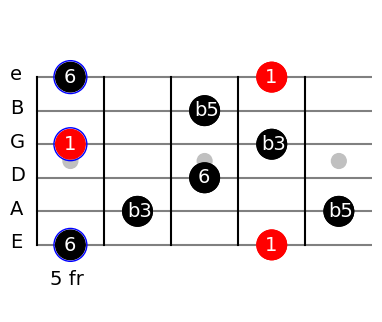

13


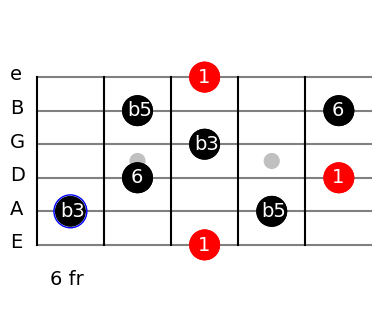

15


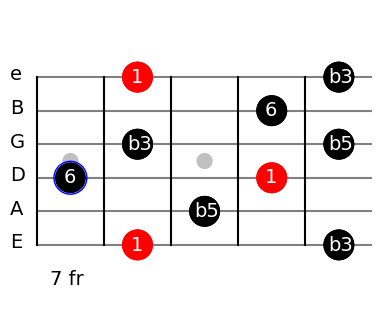

16


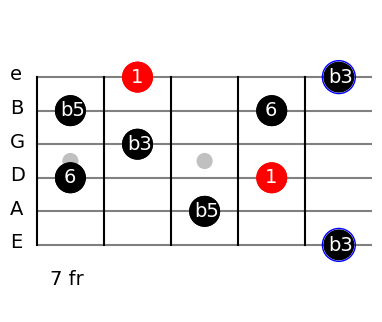

18


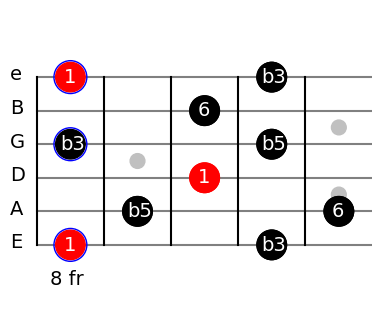

20


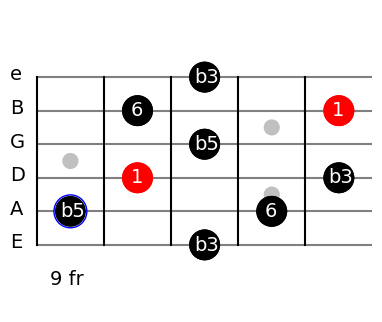

22


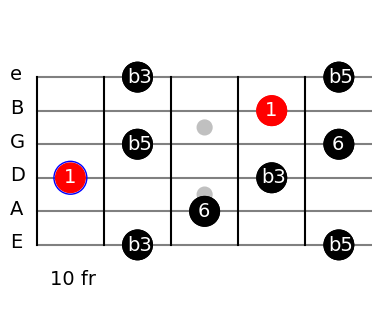

23


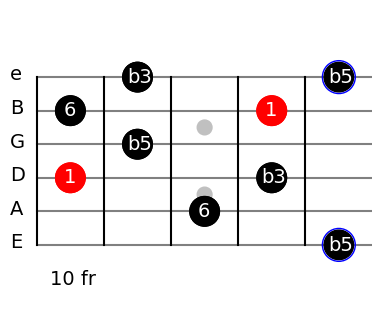

25


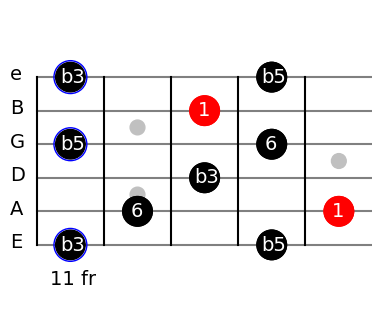

27


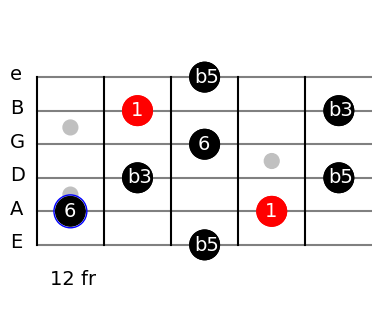

In [3]:
from PyFreatboard.build_shape import BuildShape
from PyFreatboard.draw_shape import DrawShape
from PyFreatboard.definitions import PyFreatboard as PF

shapes = BuildShape(root='C', shape_type='dism')
draw = DrawShape()

for e, shape in enumerate(shapes.all_shapes):
    if shape.valid:
    # if e in [8, 23, 30, 41, 54, 59]:
        print(e)
        draw.draw(shape, text=PF.TEXT_FUNCTION, return_fig=False)
        # f.savefig('penta_{}.png'.format(e), bbox_inches='tight')
        # print(shape.to_xml())


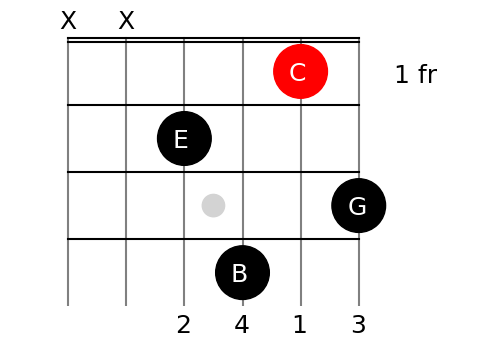

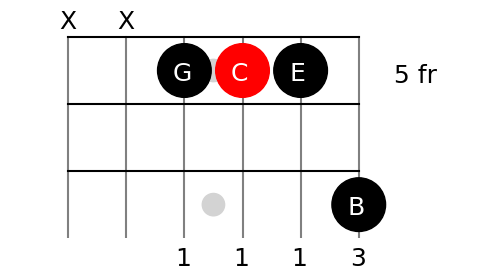

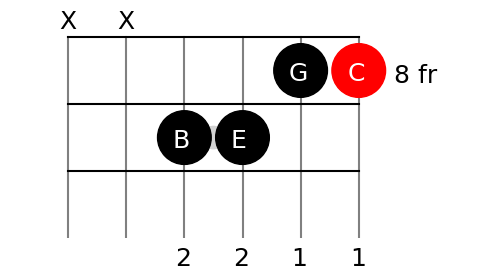

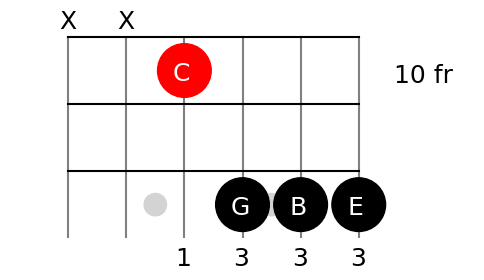

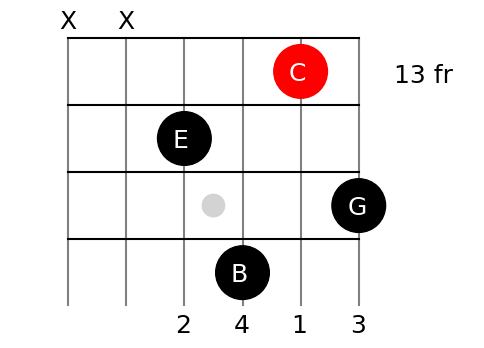

In [4]:
from PyFreatboard.build_shape import BuildShape
from PyFreatboard.draw_shape import DrawShape
from PyFreatboard.definitions import PyFreatboard as PF

c7_drop2 = BuildShape(root='C', shape_type='Maj7')
drops = c7_drop2.build_drop(drop=2, bass_string="D")
draw = DrawShape(freat_size=15)
for d in drops:
    if d.valid:
        draw.draw_vertical(d, text=PF.TEXT_PITCH)
        # print(d.to_xml())


## Import song from SongXML file

Import a shapes defined using SongXML file and genertate shapes for its scales (arpeggios and drops to be done).

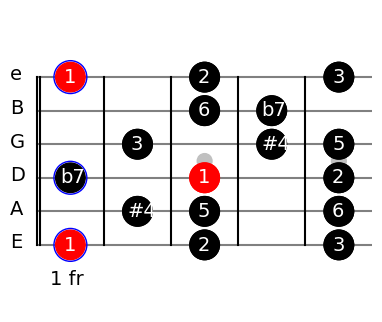

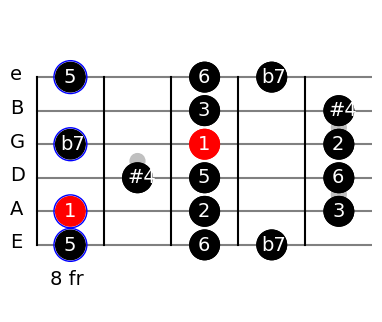

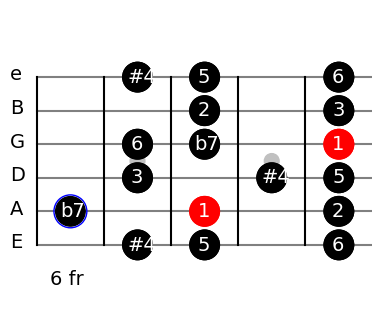

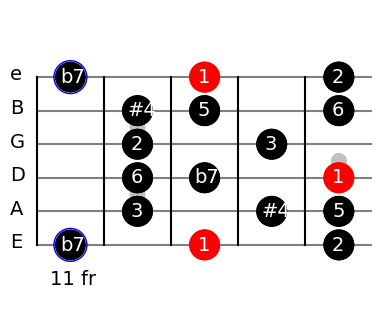

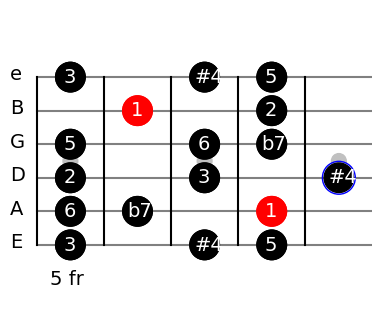

In [8]:
from PyFreatboard.song import Song
from PyFreatboard.draw_shape import DrawShape
from PyFreatboard.definitions import PyFreatboard as PF

draw = DrawShape()
song = Song("/home/narcis/PyFreatboard/shapes_xml/modes.xml")
shapes = song.get_scale_type_at_root('Lydianb7', 'F')
for i, s in enumerate(shapes):
    f = draw.draw(s, text=PF.TEXT_FUNCTION, return_fig=True)
    f.savefig("Mixob9#9b13_{}.png".format(i), dpi=300, bbox_inches='tight', pad_inches=0)